<a href="https://colab.research.google.com/github/Sara-Esm/Iris-Classifier-PyTorch/blob/main/Iris_Classifier_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Define the neural network model
class Model(nn.Module):
    def __init__(self, in_features, H1, H2, out_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, H1)
        self.fc2 = nn.Linear(H1, H2)
        self.out = nn.Linear(H2, out_features)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)
        return X

In [ ]:
# Set a manual seed for randomization
torch.manual_seed(41)

In [ ]:
# Create an instance of the model
model = Model(in_features=4, H1=8, H2=8, out_features=3)
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)


In [ ]:
# Load the Iris dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
# Convert the label column to numeric values
my_df['variety'] = my_df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})


In [ ]:
# Set X and y
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
epochs = 100
losses = []
for i in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss.item()}')

Epoch: 0, Loss: 1.1318365335464478
Epoch: 10, Loss: 0.9658561944961548
Epoch: 20, Loss: 0.678993821144104
Epoch: 30, Loss: 0.4004894196987152
Epoch: 40, Loss: 0.2250950187444687
Epoch: 50, Loss: 0.12207333743572235
Epoch: 60, Loss: 0.07481686770915985
Epoch: 70, Loss: 0.05451279506087303
Epoch: 80, Loss: 0.044374920427799225
Epoch: 90, Loss: 0.03837944194674492


In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print('Test accuracy:', accuracy)

Test accuracy: 0.9666666666666667


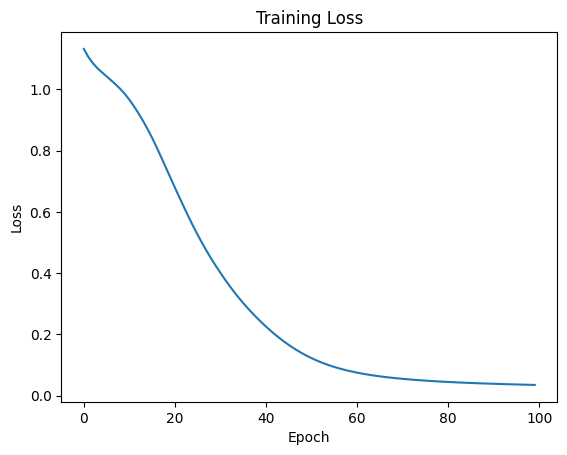

In [ ]:
# Plot the loss over epochs
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()